    Copyright(c) 2022-
    Author: Chaitanya Tejaswi (github.com/CRTejaswi)    License: GPL v3.0+

# SPICE Simulations: MTJ Characteristics

## Utilities

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# model     = 'models/fong2013'
# datafile  = 'imtj-ap2p.printtr0'
# datafile  = 'imtj-p2ap.printtr0'
# datafile  = 'pmtj-ap2p.printtr0'
# datafile  = 'pmtj-p2ap.printtr0'

def plot_spice(model='fong2013',datafile=None, datatype='spice', lineRange=slice(8,3008),
               plot=True, plotType=None, plotName=None,
              debug=False):
    file=f'models/{model}/{datafile}'
    data=[]
    match datatype:
        case 'spice':
            data = [line.strip() for line in open(file)][lineRange]
            data = [x.split(' ',maxsplit=3) for x in data]
            t  = [x[0] for x in data]
            mx = [x[1] for x in data]
            my = [x[2] for x in data]
            mz = [x[3] for x in data]
            # Plot
            plt.plot(t,mx, color='#FF0000', linestyle='--', label='$m_{x}$')
            plt.plot(t,my, color='#00FF00', linestyle='--', label='$m_{y}$')
            plt.plot(t,mz, color='#0000FF', linestyle='--', label='$m_{z}$') 
            plt.title(plotName); plt.xlabel('Time (ns)'); plt.ylabel('Magnetisation (A/m)');
            plt.grid(); plt.legend(); plt.xticks([]); plt.yticks([]); plt.show(); 
        case 'csv':
            data = [line.strip() for line in open(file)][1:]
            data = [x.split(',',maxsplit=7) for x in data]
            t  = [x[0] for x in data]
            n1 = [x[1] for x in data]
            n2 = [x[3] for x in data]
            I  = [x[5] for x in data]
            R  = [x[7] for x in data]
            # Plot
            plt.figure(figsize=(16,9));
            plt.plot(t,n1, color='#FF0000', linestyle='--', label='n1')
            plt.plot(t,n2, color='#FFD000', linestyle='--', label='n2')
            plt.plot(t,I, color='#00FF00', linestyle='--', label='I')
            plt.plot(t,R, color='#0000FF', linestyle='--', label='R')
            plt.title(plotName); plt.xlabel('Time (ns)'); plt.ylabel('');
            xcoords=[x for x in np.arange(2e-10, 2e-07, 1e-9)]; #ycoords=np.arange(2e-10, 2e-07, 1e-9);
            plt.legend(); plt.xticks(xcoords, xcoords); plt.yticks([]); plt.show(); #plt.grid();
        case _:
            raise NotImplementedError(f"'{datatype}' files aren't supported!")
    if debug:    return data

## Magnetisation: Fong2013 Model

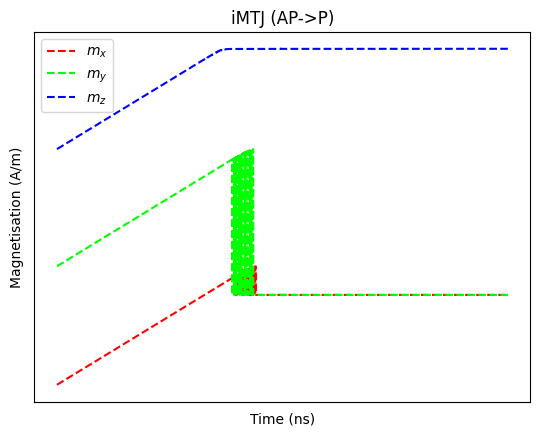

In [2]:
plot_spice(datafile='imtj-ap2p.printtr0', plotName='iMTJ (AP->P)')

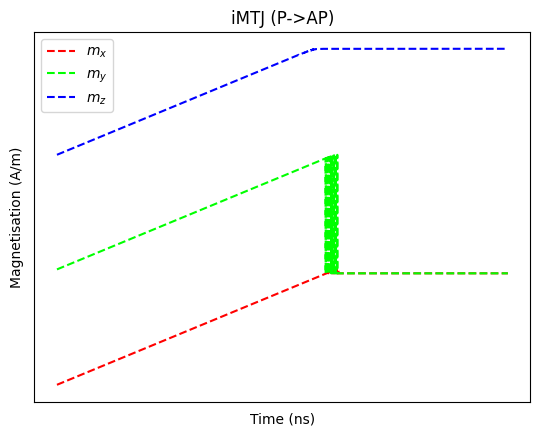

In [3]:
plot_spice(datafile='imtj-p2ap.printtr0', plotName='iMTJ (P->AP)')

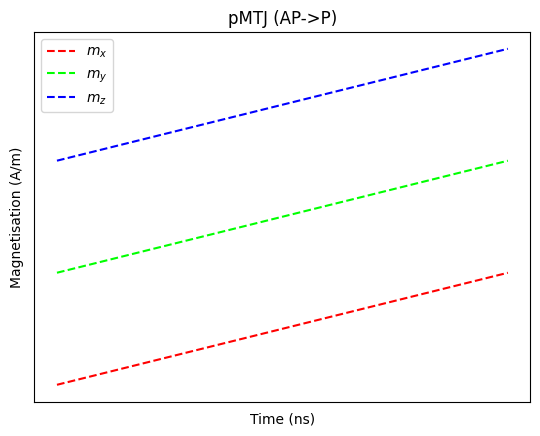

In [4]:
plot_spice(datafile='pmtj-ap2p.printtr0', plotName='pMTJ (AP->P)')

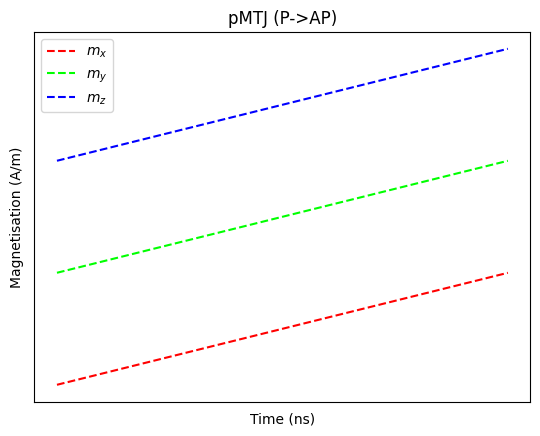

In [5]:
plot_spice(datafile='pmtj-p2ap.printtr0', plotName='pMTJ (P->AP)')

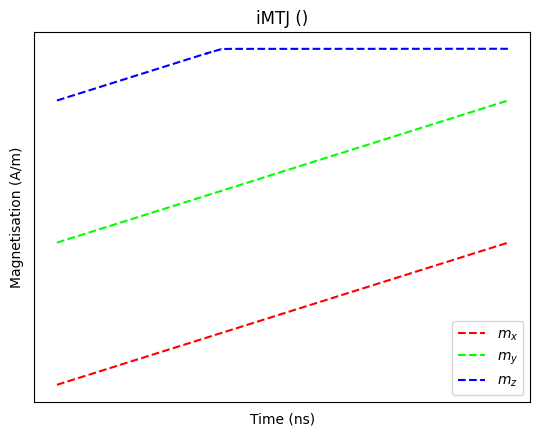

In [6]:
plot_spice(datafile='imtj-calibration', plotName='iMTJ ()')

## Magnetisation: Beihang STT-pMTJ Model

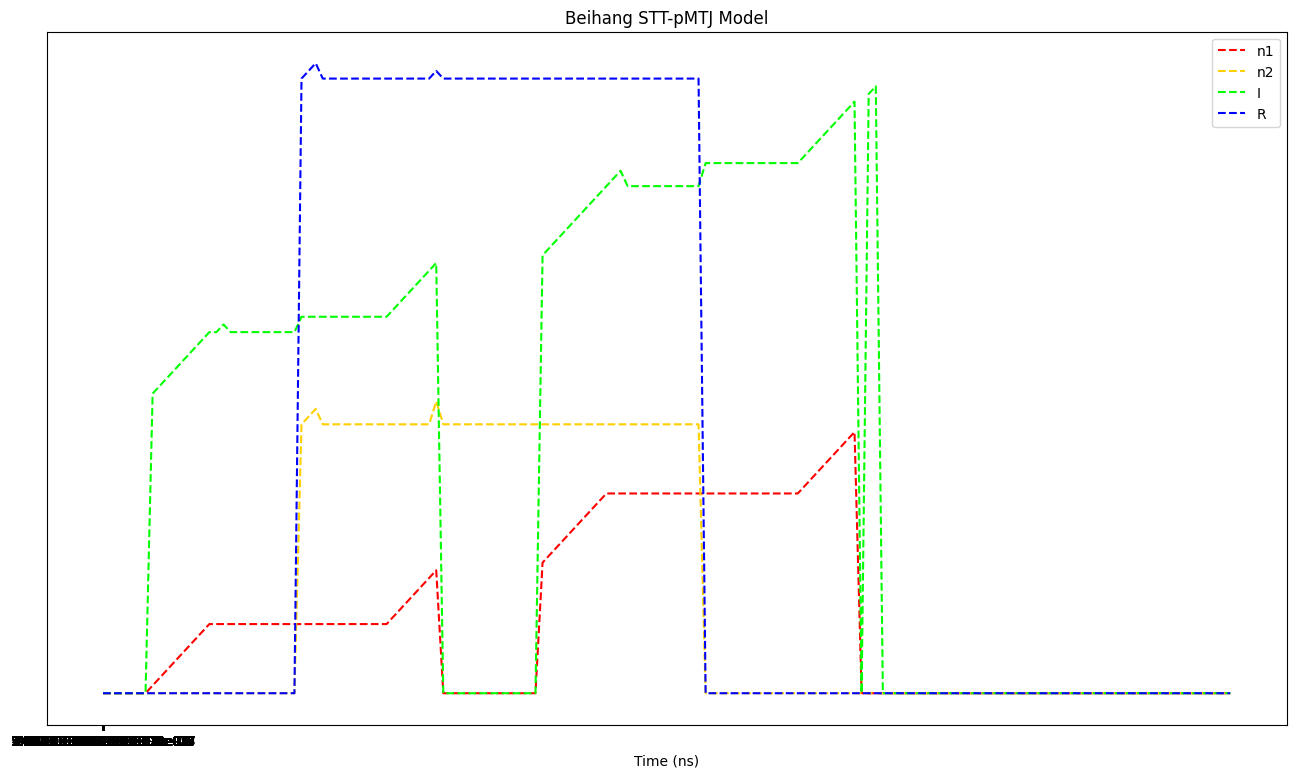

In [7]:
plot_spice(model='beihang/stt-pmtj', datafile='stt-pmtj1.csv', datatype='csv', plotName='Beihang STT-pMTJ Model')

## Magnetisation: Kim2015 STT-pMTJ Model

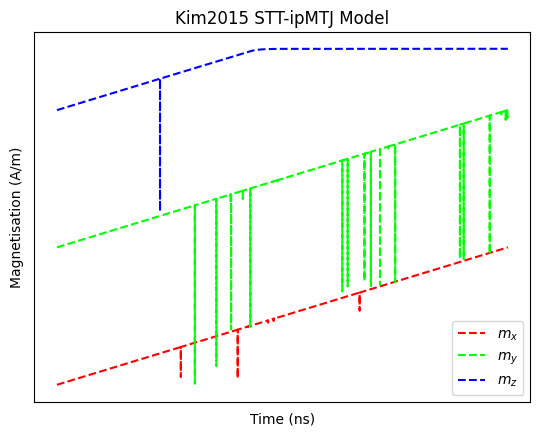

In [8]:
data = plot_spice(model='kim2015/stt-ipmtj', datafile='trans1', datatype='spice', lineRange=slice(10,10000), plotName='Kim2015 STT-ipMTJ Model', debug=True)

In [9]:
data

[['6.00000p', '13.2235m', '82.4477m', '-996.5029m'],
 ['7.00000p', '15.3902m', '81.9783m', '-996.4925m'],
 ['8.00000p', '17.5569m', '81.5089m', '-996.4822m'],
 ['9.00000p', '19.7236m', '81.0396m', '-996.4718m'],
 ['10.00000p', '21.8903m', '80.5702m', '-996.4614m'],
 ['11.00000p', '24.0569m', '80.1008m', '-996.4510m'],
 ['12.00000p', '26.2236m', '79.6314m', '-996.4406m'],
 ['13.00000p', '28.3903m', '79.1620m', '-996.4302m'],
 ['14.00000p', '30.5570m', '78.6927m', '-996.4199m'],
 ['15.00000p', '32.6455m', '77.9285m', '-996.4093m'],
 ['16.00000p', '34.6911m', '77.0025m', '-996.3987m'],
 ['17.00000p', '36.7367m', '76.0766m', '-996.3881m'],
 ['18.00000p', '38.7823m', '75.1506m', '-996.3775m'],
 ['19.00000p', '40.8279m', '74.2247m', '-996.3668m'],
 ['20.00000p', '42.8735m', '73.2987m', '-996.3562m'],
 ['21.00000p', '44.9191m', '72.3727m', '-996.3456m'],
 ['22.00000p', '46.9506m', '71.4199m', '-996.3349m'],
 ['23.00000p', '48.7723m', '70.0681m', '-996.3241m'],
 ['24.00000p', '50.5941m', '68.7